# 0.0 IoT Planning

## Input

**1.** Problem Statement

Customer Personality Analysis is a detailed analysis of a company’s ideal customers. It helps a business to better understand its customers and makes it easier for them to modify products according to the specific needs, behaviors and concerns of different types of customers.

Customer personality analysis helps a business to modify its product based on its target customers from different types of customer segments. For example, instead of spending money to market a new product to every customer in the company’s database, a company can analyze which customer segment is most likely to buy the product and then market the product only on that particular segment.

**2.** Dataset

Information about customer's of a particularly store. 

## Output

**1.** List of customers is specific cluster and cluster specifications.

**2.** Report with business questions anwsers:
- Who are the people eligible to participate in the Insiders program?
- How many customers will be part of each group?
- What are the main characteristics of customers in each group?
- What percentage of revenue contribution comes from Insiders?
- What are the group's revenue expectation for the coming months?
- What are the conditions for a person to be eligible for Insiders?
- What are the conditions for a person to be removed from Insiders?
- What is the guarantee that the Insiders program is better than the rest of the base?
- What actions can marketing time take to increase revenue?

## Tasks

- O que será considerado para definir os 'clientes mais valiosos'? 
    - Faturamento
    - Alto ticket médio
    - Alto LTV
    - Baixa recência
    - Alto basket size
    - Baixa probabilidade de churn
    - Visualização de campanhas
    - Engajamento em campanhas
    
    
- Caracteristicas em comum dos clientes em um cluster
    - idade
    - localização
    - income
    - familia
    - compras
    - engajamento de campanhas
    
    
- Média de valor gasto e número de compras por cluster

# 1.0 Imports

In [47]:
import pandas  as pd
import numpy   as np
import seaborn as sns

from matplotlib          import pyplot as plt
from pycaret.regression  import *
from sklearn             import cluster as c
from sklearn             import metrics as m
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

## 1.1 Load Data 

In [2]:
df_raw = pd.read_csv('data/marketing_campaign.csv', header=0, sep='\t') 

# 2.0 Data Description

In [3]:
df1 = df_raw.copy()

## 2.1 Data Dimensions

In [4]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 2240
Number of columns: 29


## 2.2 Rename Columns

In [5]:
df1.columns = df1.columns.str.lower()

## 2.3 Data Types

In [6]:
df1.dtypes

id                       int64
year_birth               int64
education               object
marital_status          object
income                 float64
kidhome                  int64
teenhome                 int64
dt_customer             object
recency                  int64
mntwines                 int64
mntfruits                int64
mntmeatproducts          int64
mntfishproducts          int64
mntsweetproducts         int64
mntgoldprods             int64
numdealspurchases        int64
numwebpurchases          int64
numcatalogpurchases      int64
numstorepurchases        int64
numwebvisitsmonth        int64
acceptedcmp3             int64
acceptedcmp4             int64
acceptedcmp5             int64
acceptedcmp1             int64
acceptedcmp2             int64
complain                 int64
z_costcontact            int64
z_revenue                int64
response                 int64
dtype: object

## 2.4 Check N/A

In [7]:
df1.isna().sum()

id                      0
year_birth              0
education               0
marital_status          0
income                 24
kidhome                 0
teenhome                0
dt_customer             0
recency                 0
mntwines                0
mntfruits               0
mntmeatproducts         0
mntfishproducts         0
mntsweetproducts        0
mntgoldprods            0
numdealspurchases       0
numwebpurchases         0
numcatalogpurchases     0
numstorepurchases       0
numwebvisitsmonth       0
acceptedcmp3            0
acceptedcmp4            0
acceptedcmp5            0
acceptedcmp1            0
acceptedcmp2            0
complain                0
z_costcontact           0
z_revenue               0
response                0
dtype: int64

## 2.5 Replace N/A

In [8]:
df1 = df1.dropna(subset=['income'])
print('Removed data: {:.2f}'.format(1-(df1.shape[0]/df_raw.shape[0])))

Removed data: 0.01


## 2.6 Change data types

In [9]:
#dt_customer
df1['dt_customer'] = pd.to_datetime(df1['dt_customer'], format='%d-%m-%Y')

## 2.7 Descriptive Statistics

# 3.0 Data Filtering

# 4.0 Feature Engineering

In [10]:
df4 = df1.copy()

In [11]:
#total amount spend
df4['mnttotal'] = df4['mntwines'] + df4['mntfruits'] + df4['mntmeatproducts'] + df4['mntfishproducts'] + df4['mntsweetproducts'] + df4['mntgoldprods']

#total number of purchases
df4['numtotalpurchases'] = df4['numwebpurchases'] + df4['numcatalogpurchases'] + df4['numstorepurchases'] + df4['numwebvisitsmonth']

# 5.0 EDA (Exploratory Data Analysis)

# 6.0 Data Preparation

# 7.0 Feature Selection

# 8.0 Hyperparameter Fine-Tuning

In [12]:
X = df4.drop(columns=['id', 'education', 'marital_status', 'dt_customer', 'mntwines','mntfruits', 'mntmeatproducts', 'mntfishproducts', 'mntsweetproducts', 'mntgoldprods', 'numwebpurchases',
                       'numcatalogpurchases', 'numstorepurchases', 'numwebvisitsmonth'])

In [14]:
clusters = [2, 3, 4, 5, 6]

## 8.1 Within-cluster Sum of Square (WSS) 

WSS = o quão unidos/juntos os pontos de um mesmo cluster estão.

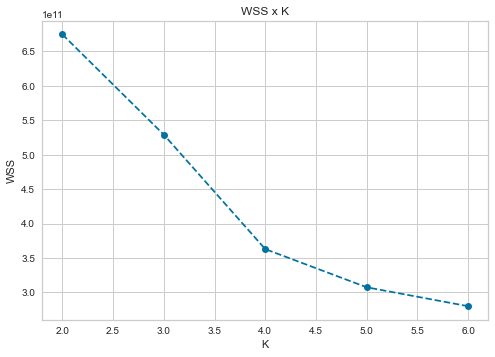

In [15]:
wss = []
for k in clusters:
    #model definition
    kmeans = c.KMeans(init='random', n_clusters=k, n_init=10, max_iter=300, random_state=42)
    
    #model training
    kmeans.fit(X)
    
    #validation
    wss.append(kmeans.inertia_)

#plot wss - Elbow Method
plt.plot(clusters, wss, linestyle='--', marker='o', color='b')
plt.xlabel('K');
plt.ylabel('WSS');
plt.title('WSS x K');

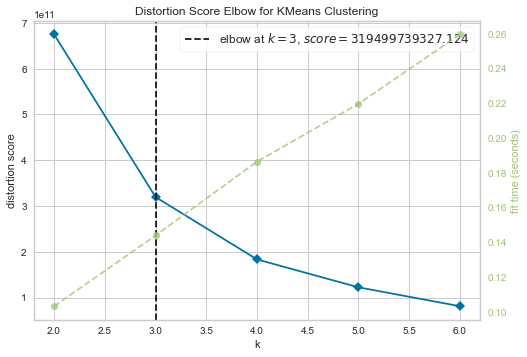

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [16]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, timing=False)
kmeans.fit(X)
kmeans.show()

## 8.2 Silhouette Score

SS = o quão distante um cluster está do outro.

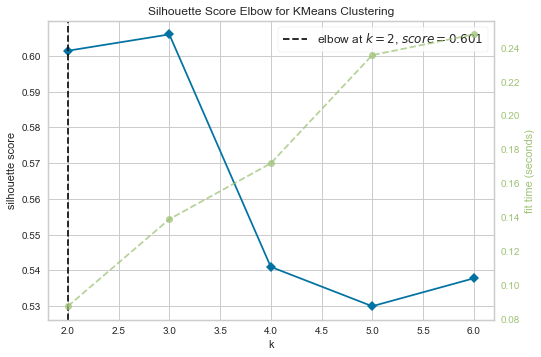

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [17]:
kmeans = KElbowVisualizer(c.KMeans(), k=clusters, metric='silhouette', timing=False)
kmeans.fit(X)
kmeans.show()

# 9.0 Model Training

In [49]:
#model definition
kmeans = c.KMeans(init='random', n_clusters=2, n_init=10, max_iter=300, random_state=42)
    
#model training
kmeans.fit(X)
    
#model predict
labels = kmeans.predict(X)

## 9.1 Cluster Validation

In [50]:
#WSS (within-cluster sum of square)
print('WSS values: {}'.format(kmeans.inertia_))

#SS (silhouette score)
print('SS value: {}'.format(m.silhouette_score(X, labels, metric='euclidean')))

WSS values: 674709265096.6304
SS value: 0.6014512845780737


# 10.0 Cluster Analysis

In [19]:
df10 = X.copy()
df10['cluster'] = labels
df10.head()

,year_birth,income,kidhome,teenhome,recency,numdealspurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnttotal,numtotalpurchases,cluster
0,1957,58138.0,0,0,58,3,0,0,0,0,0,0,3,11,1,1617,29,1
1,1954,46344.0,1,1,38,2,0,0,0,0,0,0,3,11,0,27,9,0
2,1965,71613.0,0,0,26,1,0,0,0,0,0,0,3,11,0,776,24,1
3,1984,26646.0,1,0,26,2,0,0,0,0,0,0,3,11,0,53,12,0
4,1981,58293.0,1,0,94,5,0,0,0,0,0,0,3,11,0,422,19,1


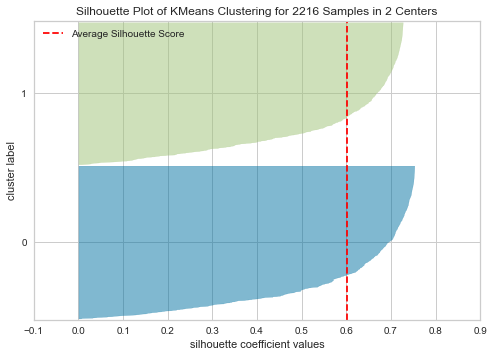

In [22]:
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

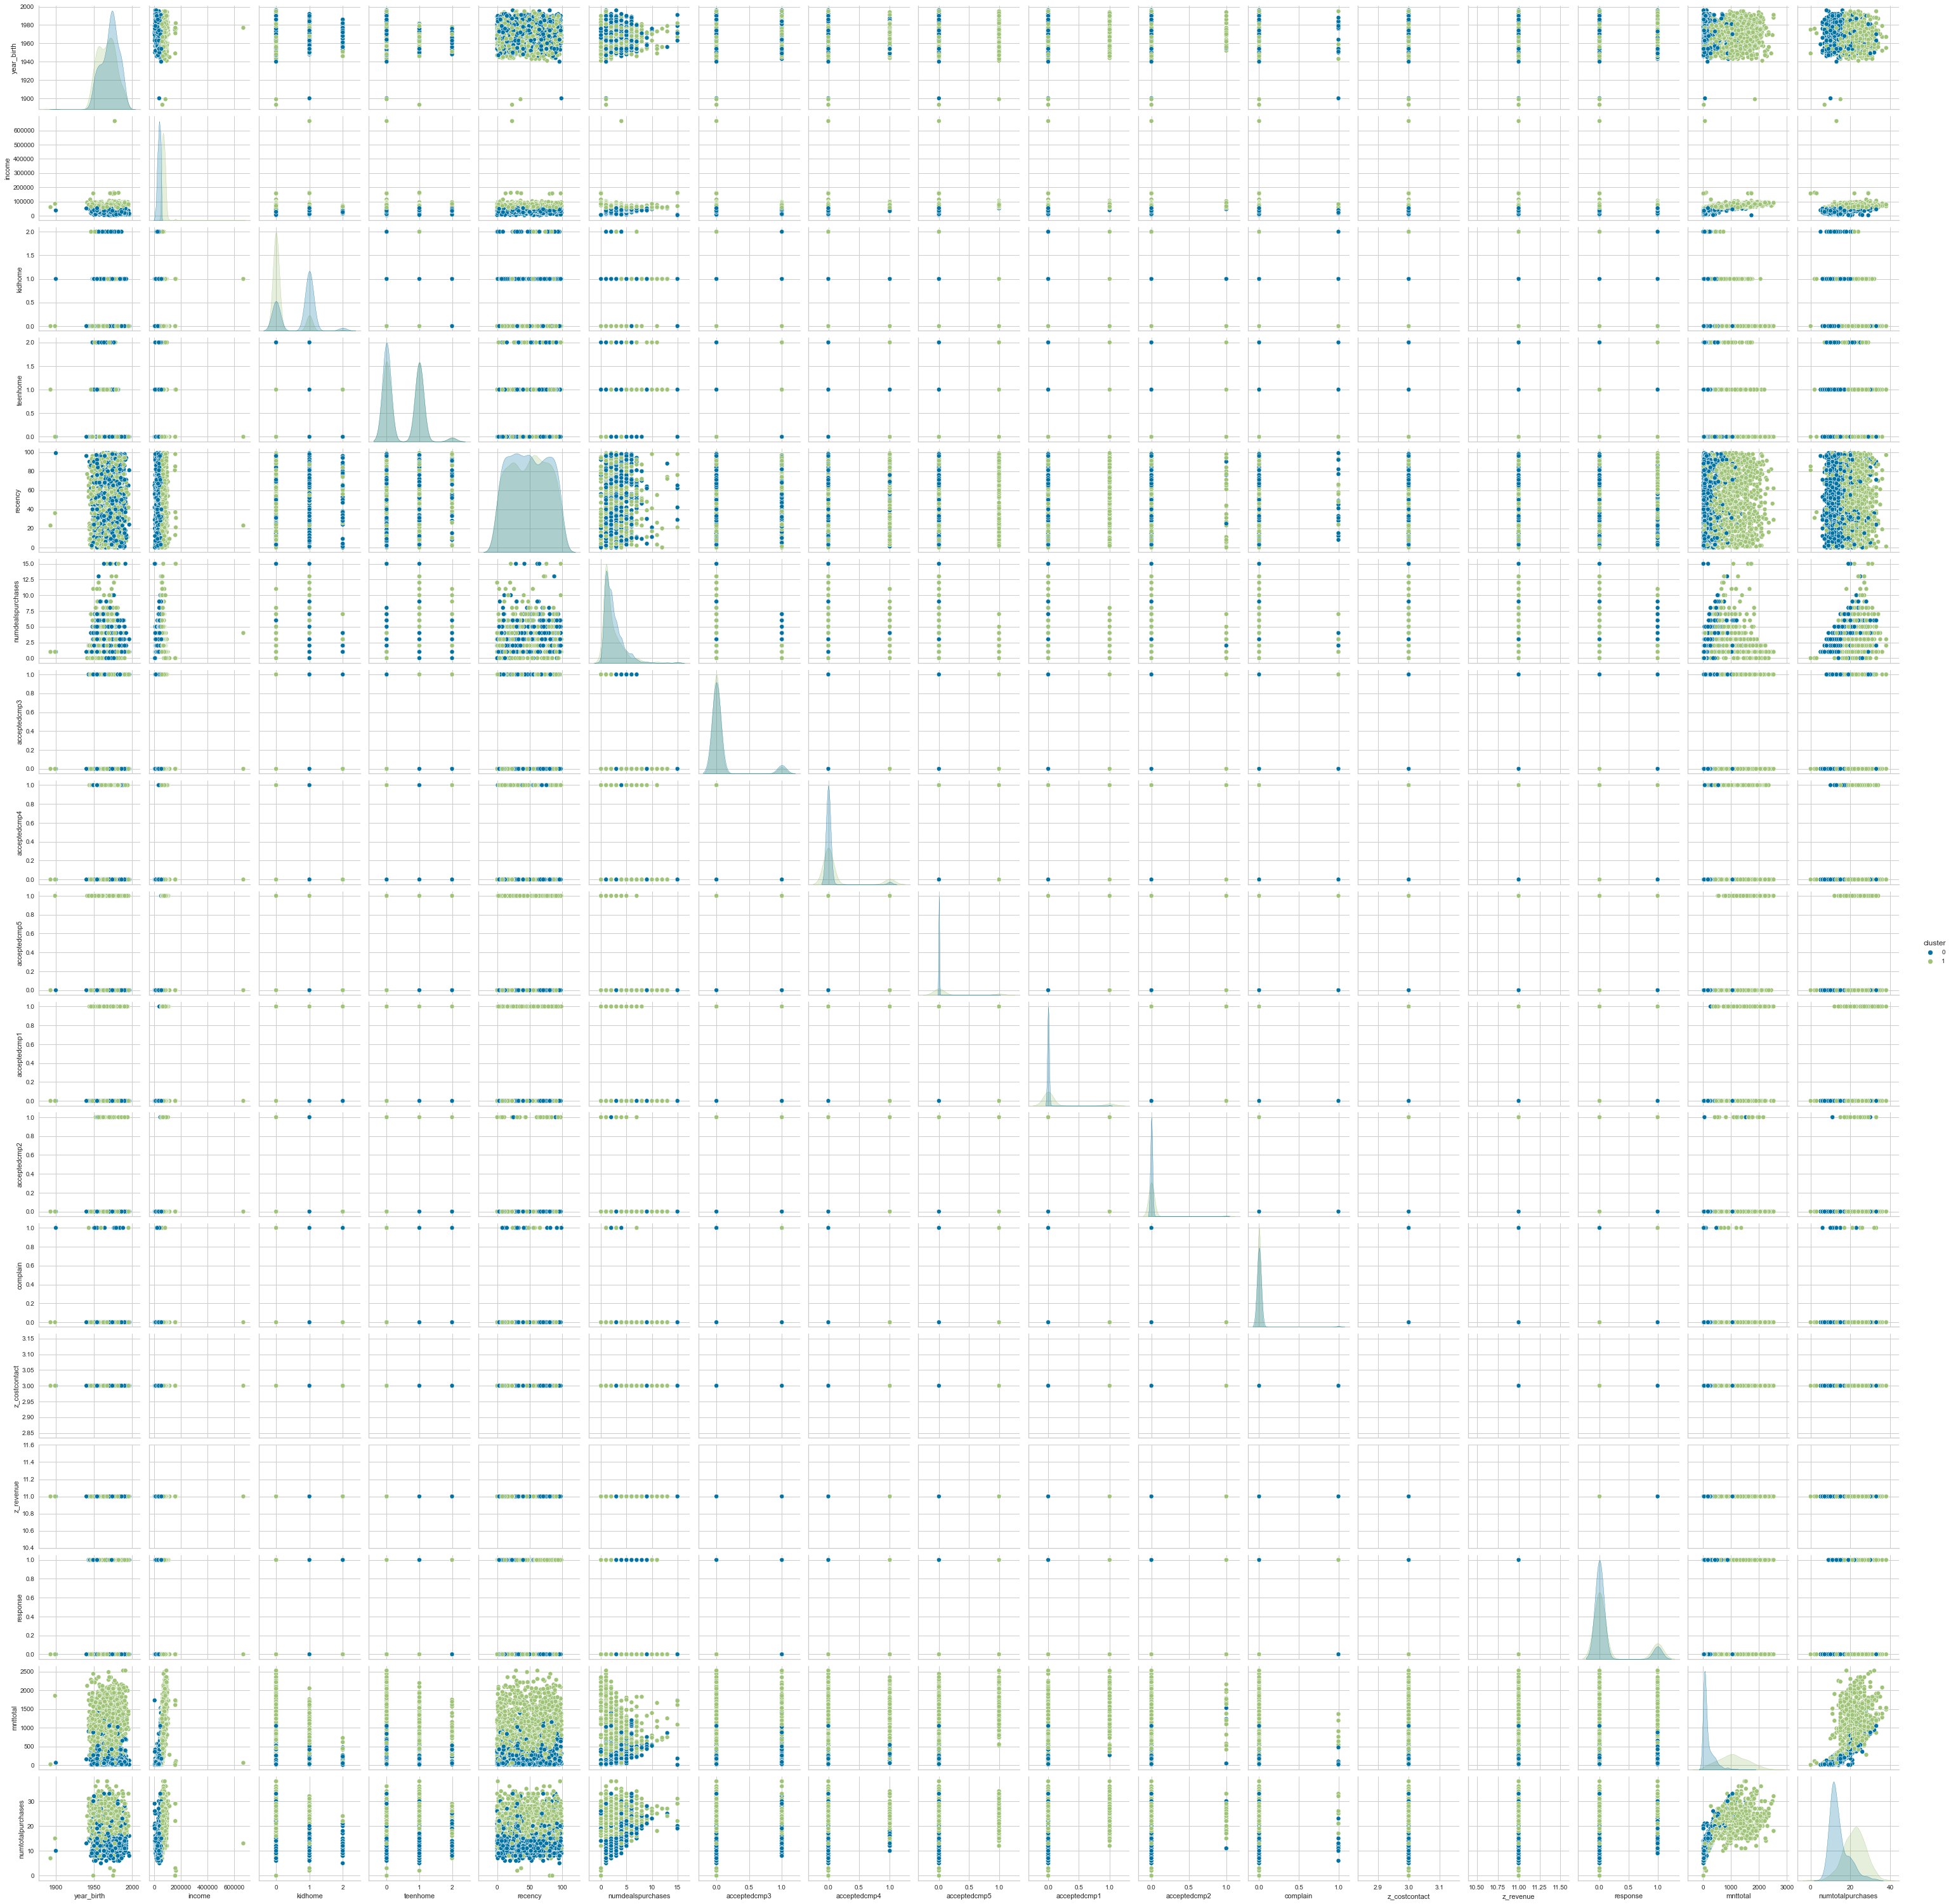

In [23]:
sns.pairplot(df10, hue='cluster')

# 11.0 Cluster Exploratory Data Analysis

In [27]:
df11 = df10.copy()
df11['id'] = df4['id']

In [29]:
df11.head()

,year_birth,income,kidhome,teenhome,recency,numdealspurchases,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,mnttotal,numtotalpurchases,cluster,id
0,1957,58138.0,0,0,58,3,0,0,0,0,0,0,3,11,1,1617,29,1,5524
1,1954,46344.0,1,1,38,2,0,0,0,0,0,0,3,11,0,27,9,0,2174
2,1965,71613.0,0,0,26,1,0,0,0,0,0,0,3,11,0,776,24,1,4141
3,1984,26646.0,1,0,26,2,0,0,0,0,0,0,3,11,0,53,12,0,6182
4,1981,58293.0,1,0,94,5,0,0,0,0,0,0,3,11,0,422,19,1,5324


In [41]:
#number of customers
df_cluster = df11[['id', 'cluster']].groupby('cluster').count().reset_index()
df_cluster['perc_customers'] = 100*(df_cluster['id']/df_cluster['id'].sum())

#avg_income
df_avg_income = df11[['income', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_income, how='inner', on='cluster')

#avg_recency
df_avg_recency = df11[['recency', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_recency, how='inner', on='cluster')

#avg_total_spend
df_avg_spend = df11[['mnttotal', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_spend, how='inner', on='cluster')

#avg_total_purchases
df_avg_purchases = df11[['numtotalpurchases', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_purchases, how='inner', on='cluster')

#avg_kids
df_avg_kids = df11[['kidhome', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_kids, how='inner', on='cluster')

#avg_teen
df_avg_teen = df11[['teenhome', 'cluster']].groupby('cluster').mean().reset_index()
df_cluster = pd.merge(df_cluster, df_avg_teen, how='inner', on='cluster')

In [42]:
df_cluster.head()

,cluster,id,perc_customers,income,recency,mnttotal,numtotalpurchases,kidhome,teenhome
0,0,1149,51.850181,34765.867711,49.105309,169.557876,13.994778,0.711053,0.476936
1,1,1067,48.149819,71072.096532,48.912840,1078.216495,22.056232,0.151828,0.536082


# 12.0 Deploy